#MSDS422_Assignment 2: Classification Methods

### System & Data Setup

In [0]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
import matplotlib # import matplotlib
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map

In [0]:
# suppress warning messages
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [0]:
#install PyDrive to pull in csv data
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#https://drive.google.com/file/d/1g6SX7BlFXgbpwIXqzoim6WdMRI3umfx1/view?usp=sharing

#download survey data from google drive
downloaded1 = drive.CreateFile({'id': '1g6SX7BlFXgbpwIXqzoim6WdMRI3umfx1'})
downloaded1.GetContentFile('bank.csv')

In [110]:
# read csv file
bank = pd.read_csv('bank.csv', sep = ';') 
# examine the shape of original input data
print(bank.shape)

(4521, 17)


### Data Exploration

####Dataframe Creation & Descriptions

In [68]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [69]:
#create initial dataframe 'df_bank' and drop non-values
df_bank = pd.DataFrame(bank)
df_bank = df_bank.dropna()
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [70]:
#check data types
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
response     object
dtype: object

In [71]:
#check column titles
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'response'],
      dtype='object')

#### Initial variable exploration

##### Continuous Variables - Histograms

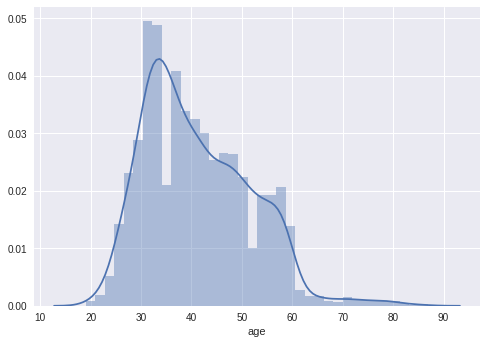

In [72]:
fig = sns.distplot(df_bank['age'])

(0, 6000)

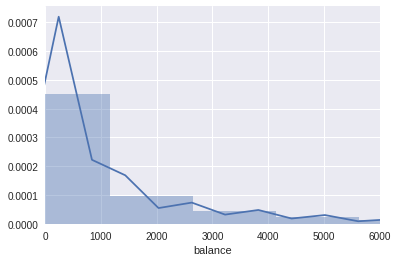

In [147]:
fig2 = sns.distplot(df_bank['balance'])
sns.plt.xlim(0, 6000)


(0, 100)

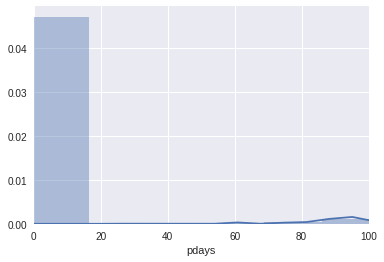

In [150]:
fig3 = sns.distplot(df_bank['pdays'])
sns.plt.xlim(0, 100)

(0, 1000)

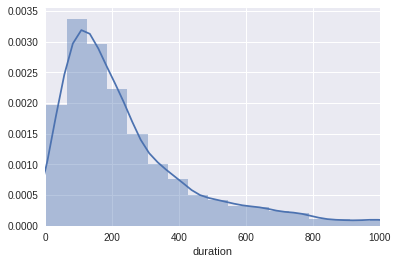

In [146]:
fig4 = sns.distplot(df_bank['duration'])
sns.plt.xlim(0, 1000)

##### Classification Variables - Value Counts

In [144]:
df_bank['response'].value_counts()

no     4000
yes     521
Name: response, dtype: int64

In [76]:
df_bank['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [77]:
df_bank['marital'].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [78]:
df_bank['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [79]:
df_bank['month'].value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

##### Explore Frequency of Key Variables to Response

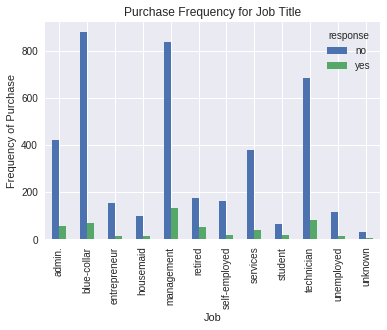

In [80]:
%matplotlib inline
pd.crosstab(df_bank.job,df_bank.response).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

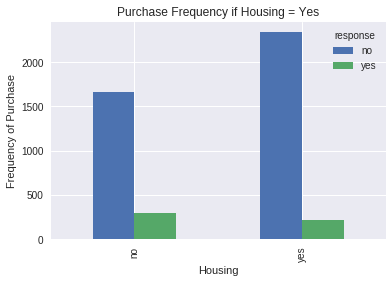

In [81]:
%matplotlib inline
pd.crosstab(df_bank.housing,df_bank.response).plot(kind='bar')
plt.title('Purchase Frequency if Housing = Yes')
plt.xlabel('Housing')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_housing')

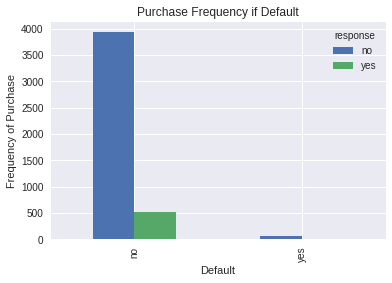

In [82]:
%matplotlib inline
pd.crosstab(df_bank.default,df_bank.response).plot(kind='bar')
plt.title('Purchase Frequency if Default')
plt.xlabel('Default')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_default')

#### Data Transformation and creation of 'Dummy' variables

In [111]:
#create backup dataframe for changes
df_bank_imp = df_bank.copy()
df_bank_imp.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'response'],
      dtype='object')

In [112]:
#create a list of columns with yes/no values to convert to 0 and 1
list_binary = ['default', 'housing', 'loan', 'response']

#loop through those columns and replace yes/no values with 0 and 1
for X in list_binary: 
    df_bank_imp[X] = pd.Series(np.searchsorted(['no', 'yes'], df_bank_imp[X]), df_bank_imp.index)

#create a list of any categorical column to create dummy variables:
list_dummies = ['job', 'marital', 'education','contact', 'month','poutcome']

#use the pd 'get_dummies' method to create dummy variables for all object lists: 
for column_name in list_dummies:
    dummies = pd.get_dummies(df_bank_imp[column_name], prefix='value', prefix_sep='_')
    col_names_dummies = dummies.columns.values

    #then you can append new columns to the dataframe
    for i,value in enumerate(col_names_dummies):
        df_bank_imp[value] = dummies.iloc[:,i]

#drop categorical columns and keep dummy columns:
df_bank_imp = df_bank_imp.drop(columns=['job', 'marital', 'education',\
                                        'contact', 'month','poutcome'], axis = 1)
#df_bank_imp = df_bank_imp.rename(columns={'value_yes': 'y_target_yes'})
df_bank_imp.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'response', 'value_admin.',
       'value_blue-collar', 'value_entrepreneur', 'value_housemaid',
       'value_management', 'value_retired', 'value_self-employed',
       'value_services', 'value_student', 'value_technician',
       'value_unemployed', 'value_unknown', 'value_divorced', 'value_married',
       'value_single', 'value_primary', 'value_secondary', 'value_tertiary',
       'value_cellular', 'value_telephone', 'value_apr', 'value_aug',
       'value_dec', 'value_feb', 'value_jan', 'value_jul', 'value_jun',
       'value_mar', 'value_may', 'value_nov', 'value_oct', 'value_sep',
       'value_failure', 'value_other', 'value_success'],
      dtype='object')

In [113]:
#change order of columns so that response variable is furthest to the right
df_bank_imp = df_bank_imp[['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'value_admin.', 'value_blue-collar',
       'value_entrepreneur', 'value_housemaid', 'value_management',
       'value_retired', 'value_self-employed', 'value_services',
       'value_student', 'value_technician', 'value_unemployed',
       'value_unknown', 'value_divorced', 'value_married', 'value_single',
       'value_primary', 'value_secondary', 'value_tertiary', 'value_cellular',
       'value_telephone', 'value_apr', 'value_aug', 'value_dec', 'value_feb',
       'value_jan', 'value_jul', 'value_jun', 'value_mar', 'value_may',
       'value_nov', 'value_oct', 'value_sep', 'value_failure', 'value_other',
       'value_success','response']]
df_bank_imp.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,value_jun,value_mar,value_may,value_nov,value_oct,value_sep,value_failure,value_other,value_success,response
0,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,1,0,0,0,0,0
1,33,0,4789,1,1,11,220,1,339,4,...,0,0,1,0,0,0,1,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,1,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,...,1,0,0,0,0,0,0,0,0,0
4,59,0,0,1,0,5,226,1,-1,0,...,0,0,1,0,0,0,0,0,0,0


In [114]:
df_bank_imp.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,value_jun,value_mar,value_may,value_nov,value_oct,value_sep,value_failure,value_other,value_success,response
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,...,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,0.016810,1422.657819,0.566025,0.152842,15.915284,263.961292,2.793630,39.766645,0.542579,...,0.117452,0.010838,0.309224,0.086043,0.017695,0.011502,0.108383,0.043574,0.028534,0.115240
std,10.576211,0.128575,3009.638142,0.495676,0.359875,8.247667,259.856633,3.109807,100.121124,1.693562,...,0.321994,0.103553,0.462225,0.280458,0.131856,0.106640,0.310898,0.204169,0.166510,0.319347
min,19.000000,0.000000,-3313.000000,0.000000,0.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,69.000000,0.000000,0.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,444.000000,1.000000,0.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,0.000000,1480.000000,1.000000,0.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,87.000000,1.000000,71188.000000,1.000000,1.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Find most likely variables to influence response

In [88]:
#check number of 'No' responses to 'Yes'
df_bank_imp['response'].value_counts()

0    4000
1     521
Name: response, dtype: int64

In [89]:
#create a table of mean values grouped by 'No' vs 'Yes'
summary_table = df_bank_imp.groupby('response').mean()
summary_table

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,value_jul,value_jun,value_mar,value_may,value_nov,value_oct,value_sep,value_failure,value_other,value_success
response,,,,,,,,,,,,,,,,,,,,,
0,40.998000,0.016750,1403.211750,0.584750,0.162000,15.948750,226.347500,2.862250,36.006000,0.471250,...,0.161250,0.119000,0.007000,0.326250,0.087500,0.010750,0.00875,0.106750,0.039750,0.011500
1,42.491363,0.017274,1571.955854,0.422265,0.082534,15.658349,552.742802,2.266795,68.639155,1.090211,...,0.117083,0.105566,0.040307,0.178503,0.074856,0.071017,0.03263,0.120921,0.072937,0.159309


In [152]:
#flip table and sort by mean difference
summary_table_T = summary_table.copy()
summary_table_T = summary_table.T
df_summary_table_T = pd.DataFrame(summary_table_T)
df_summary_table_T['mean_diff'] = df_summary_table_T[1]-df_summary_table_T[0]
df_summary_table_T = df_summary_table_T.sort_values('mean_diff', ascending = False).reset_index(drop=False)
df_summary_table_T.head()

response,index,0,1,mean_diff
0,duration,226.34750,552.742802,326.395302
1,balance,1403.21175,1571.955854,168.744104
2,pdays,36.00600,68.639155,32.633155
3,age,40.99800,42.491363,1.493363
4,previous,0.47125,1.090211,0.618961


In [92]:
df_summary_table_T.tail()

response,index,0,1,mean_diff
40,value_may,0.32625,0.178503,-0.147747
41,housing,0.58475,0.422265,-0.162485
42,value_unknown,0.84200,0.646833,-0.195167
43,day,15.94875,15.658349,-0.290401
44,campaign,2.86225,2.266795,-0.595455


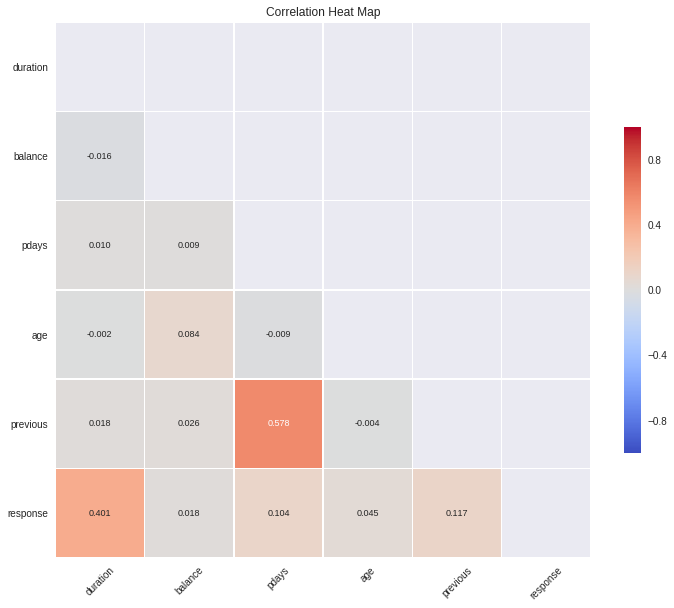

In [93]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

# define subset DataFrame for analysis of software preferences 
Selected = ['duration','balance', 'pdays','age','previous', 'response']
exploratory_variables = df_bank_imp[Selected]

# examine intercorrelations among software preference variables
# with correlation matrix/heat map
corr_chart(df_corr = exploratory_variables)  

### Model Exploration

#### Model 1 - Nearest Neighbor

In [0]:
df_bank_imp2 = df_bank_imp.copy()

# split dataframe by data and response variables and make array for train_test_split
#remove response variable from data and save as df_data
df_bank_imp_data = df_bank_imp2.drop(columns=['response'])
#remove all but response variable and save as df_response
df_bank_imp_response = df_bank_imp2.drop(columns=['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'value_admin.', 'value_blue-collar',
       'value_entrepreneur', 'value_housemaid', 'value_management',
       'value_retired', 'value_self-employed', 'value_services',
       'value_student', 'value_technician', 'value_unemployed',
       'value_unknown', 'value_divorced', 'value_married', 'value_single',
       'value_primary', 'value_secondary', 'value_tertiary', 'value_cellular',
       'value_telephone', 'value_apr', 'value_aug', 'value_dec', 'value_feb',
       'value_jan', 'value_jul', 'value_jun', 'value_mar', 'value_may',
       'value_nov', 'value_oct', 'value_sep', 'value_failure', 'value_other',
       'value_success'])

#transform data and response dataframes with same index to array
bank_imp_data_array = np.array(df_bank_imp_data.to_records().view(type=np.matrix))
bank_imp_response_array = np.array(df_bank_imp_response.to_records().view(type=np.matrix))

In [95]:
# check array
bank_imp_response_array

array([[(   0, 0), (   1, 0), (   2, 0), ..., (4518, 0), (4519, 0),
        (4520, 0)]],
      dtype=(numpy.record, [('index', '<i8'), ('response', '<i8')]))

In [0]:
#split data by training & test sets
X_train, X_test, y_train, y_test = train_test_split(\
    df_bank_imp_data, df_bank_imp_response,stratify=df_bank_imp_response, random_state=66)

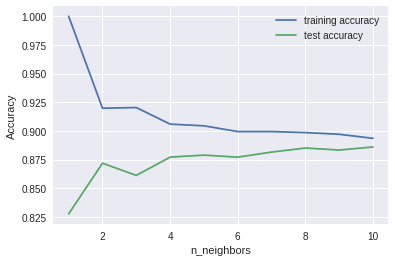

In [97]:
#split data by training & test sets
X_train, X_test, y_train, y_test = train_test_split(df_bank_imp_data, df_bank_imp_response, stratify=df_bank_imp_response, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

##### Setup & Train_Test Split 


#### Model 2 Compare Naive Bayes vs. Logistic Regression - suggested variables

##### Model 2 - Setup & Train_Test Split

In [0]:
# cross-validation scoring code adapted from Scikit Learn documentation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logreg = LogisticRegression()

# specify the set of classifiers being evaluated
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
names = ["Naive_Bayes", "Logistic_Regression"]
classifiers = [BernoulliNB(alpha=1.0, binarize=0.5, 
                           class_prior = [0.5, 0.5], fit_prior=False), 
               LogisticRegression()]

In [135]:
#create np array using variables 'default', 'housing', & 'loan' w/ 'response'
df_bank_m2 = df_bank_imp2.copy()

model_data = np.array([np.array(df_bank_m2['default']), np.array(df_bank_m1['housing']),\
                       np.array(df_bank_m2['loan']), np.array(df_bank_m2['response'])]).T

# dimensions of the additive model X input and y response
print('\nData dimensions:', model_data.shape)


Data dimensions: (4521, 4)


##### Model 2 - K_filt cross-validataion NB vs LogReg


Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4068, 3)
X_test: (453, 3)
y_train: (4068,)
y_test: (453,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.5878522062732588


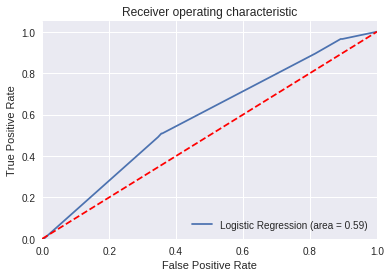


Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Area under ROC curve: 0.5878522062732588


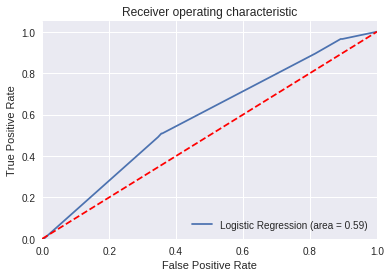


Fold index: 1 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.633727778967659


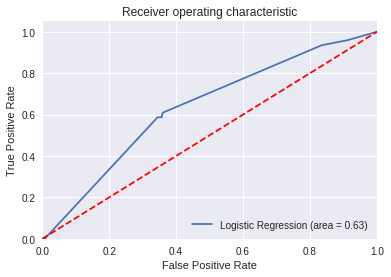


Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Area under ROC curve: 0.633727778967659


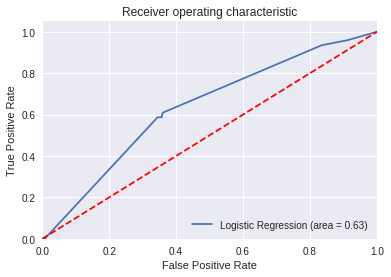


Fold index: 2 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.6575354454752319


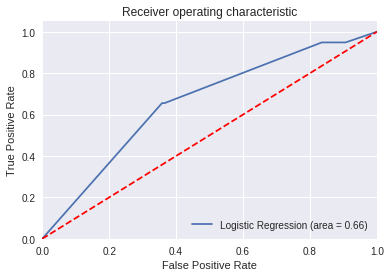


Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Area under ROC curve: 0.6575354454752319


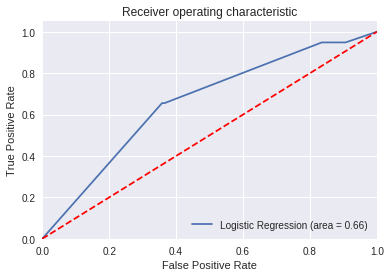


Fold index: 3 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.6373879576644552


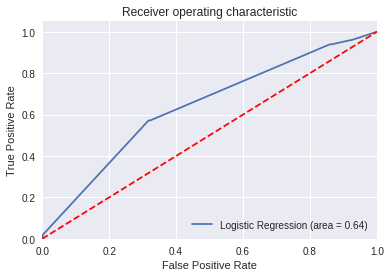


Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Area under ROC curve: 0.6355648959335594


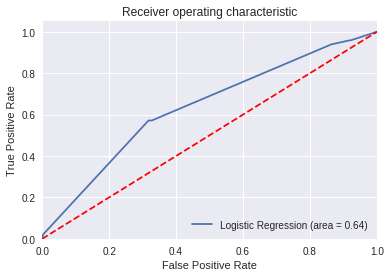


Fold index: 4 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.5743993962517295


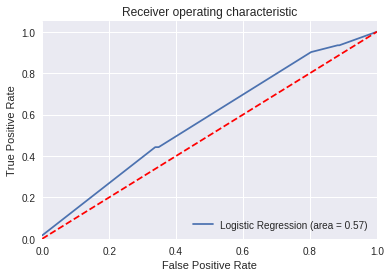


Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Area under ROC curve: 0.5743993962517295


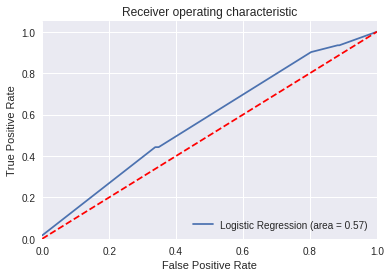


Fold index: 5 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.5746839950151327


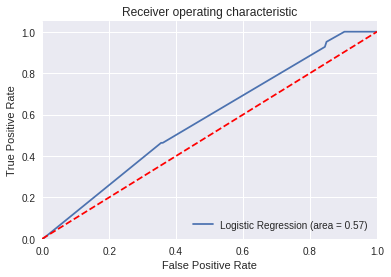


Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Area under ROC curve: 0.5842383241350662


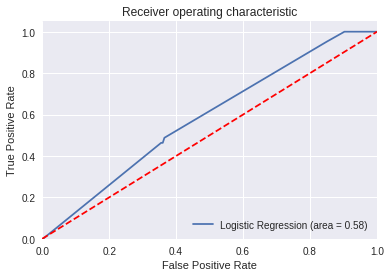


Fold index: 6 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.5625116322352502


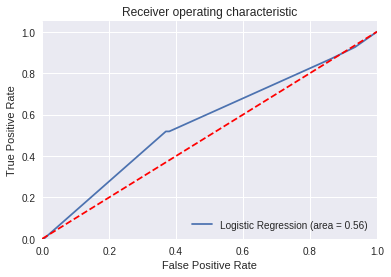


Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Area under ROC curve: 0.5625116322352502


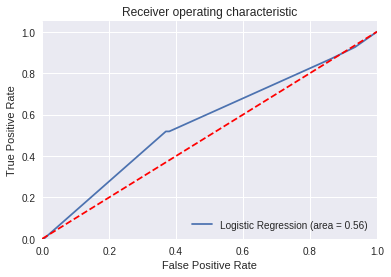


Fold index: 7 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.7311441622103387


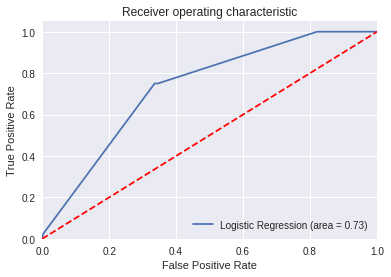


Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Area under ROC curve: 0.7311441622103387


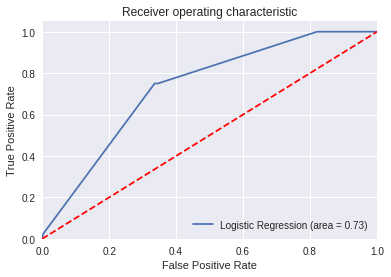


Fold index: 8 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.5735328888258382


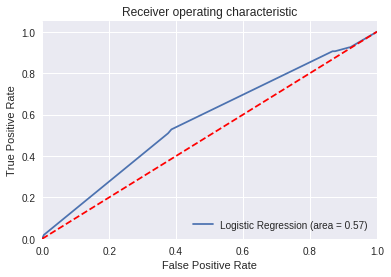


Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Area under ROC curve: 0.5735328888258382


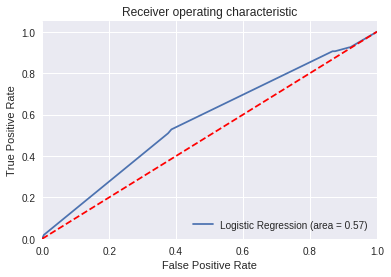


Fold index: 9 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.5778268860493612


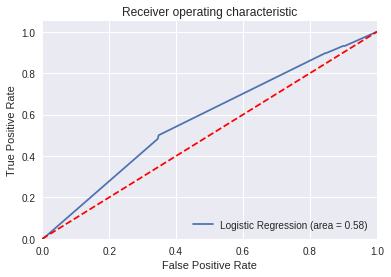


Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Area under ROC curve: 0.5768204095921582


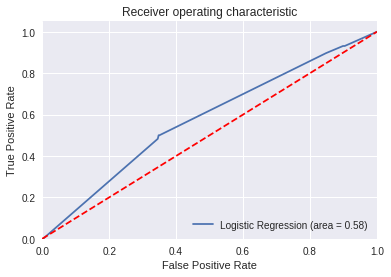


----------------------------------------------
Average results from 10-fold cross-validation

Method                 Area under ROC Curve
Naive_Bayes            0.611060
Logistic_Regression    0.611733
dtype: float64


In [153]:
# ten-fold cross-validation employed here
N_FOLDS = 10

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   note that 0:model_data.shape[1]-1 slices for explanatory variables
#   and model_data.shape[1]-1 is the index for the response variable    
    X_train = model_data[train_index, 0:model_data.shape[1]-1]
    X_test = model_data[test_index, 0:model_data.shape[1]-1]
    y_train = model_data[train_index, model_data.shape[1]-1]
    y_test = model_data[test_index, model_data.shape[1]-1]   
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

    index_for_method = 0  # initialize
    for name, clf in zip(names, classifiers):
        print('\nClassifier evaluation for:', name)
        print('  Scikit Learn method:', clf)
        clf.fit(X_train, y_train)  # fit on the train set for this fold
        # evaluate on the test set for this fold
        y_test_predict = clf.predict_proba(X_test)
        fold_method_result = roc_auc_score(y_test, y_test_predict[:,1]) 
        print('Area under ROC curve:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        #create ROC curve to validate method prediction
        logit_roc_auc = roc_auc_score(y_test, y_test_predict[:,1])
        fpr, tpr, thresholds = roc_curve(y_test, y_test_predict[:,1])
        plt.figure()
        plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.savefig('Log_ROC')
        plt.show()
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      '\nMethod                 Area under ROC Curve', sep = '')     
print(cv_results_df.mean()) 

#### Model 3 compare NB vs. LogReg - Improved Variable Selection

##### Model 3 Setup & Test_train split

In [136]:
df_bank_m3 = df_bank_imp.copy()

model_data3 = np.array([np.array(df_bank_m3['duration']), np.array(df_bank_m3['balance']),\
                       np.array(df_bank_m3['pdays']), np.array(df_bank_m3['response'])]).T

# dimensions of the additive model X input and y response
print('\nData dimensions:', model_data3.shape)


Data dimensions: (4521, 4)


##### K_fit cross-validation NB vs LogReg Model 3


Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4068, 3)
X_test: (453, 3)
y_train: (4068,)
y_test: (453,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.5822036150983518


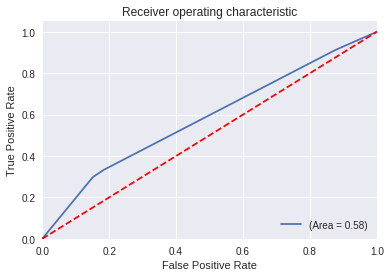


Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Area under ROC curve: 0.7967393230551125


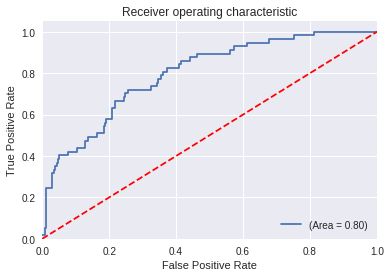


Fold index: 1 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.5903833797387021


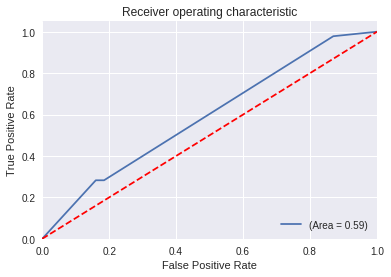


Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Area under ROC curve: 0.834600556864425


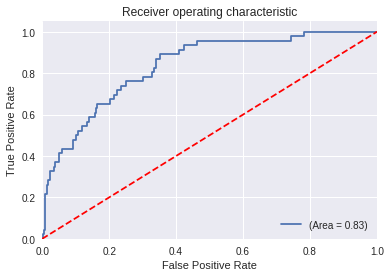


Fold index: 2 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.6370995974094171


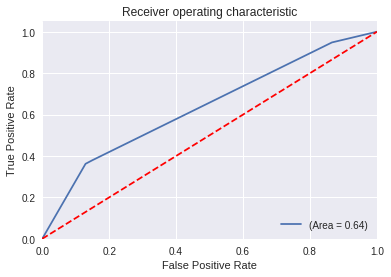


Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Area under ROC curve: 0.7601522842639594


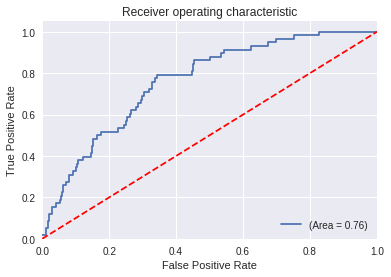


Fold index: 3 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.6107763204537399


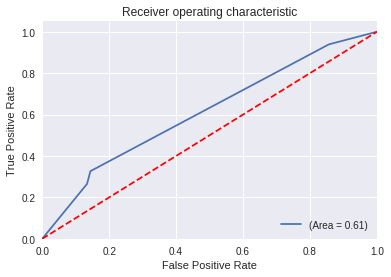


Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Area under ROC curve: 0.8054388008305058


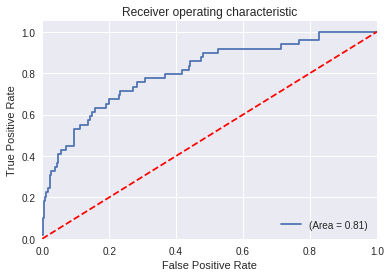


Fold index: 4 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.6395538971112322


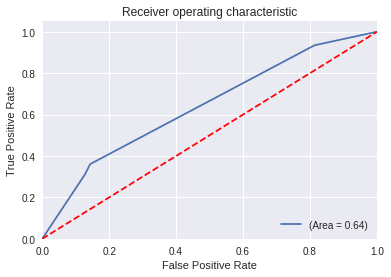


Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Area under ROC curve: 0.8577837407236593


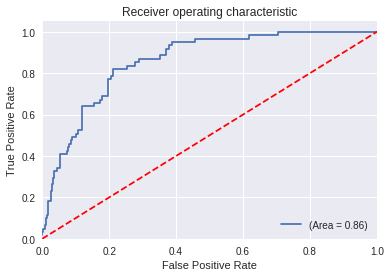


Fold index: 5 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.6735802029553143


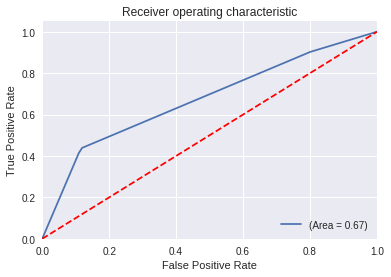


Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Area under ROC curve: 0.8834787252982019


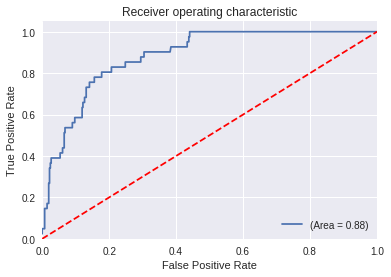


Fold index: 6 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.5881258142564676


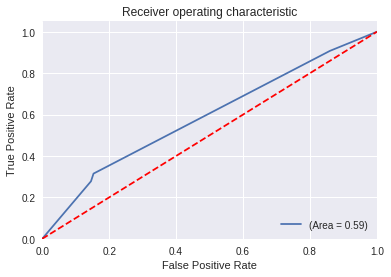


Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Area under ROC curve: 0.820677461380979


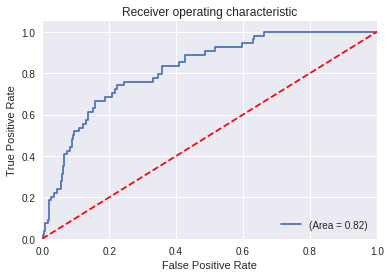


Fold index: 7 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.6298462566844919


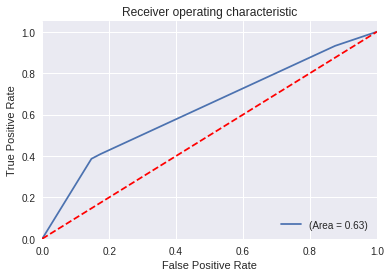


Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Area under ROC curve: 0.8792892156862746


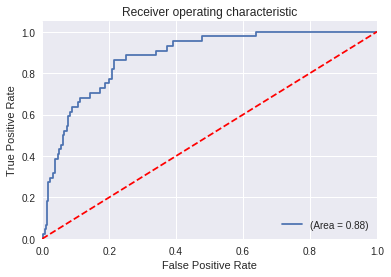


Fold index: 8 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.6012200312101007


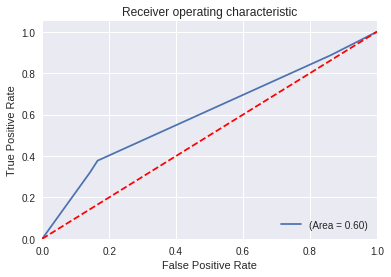


Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Area under ROC curve: 0.8057171229961697


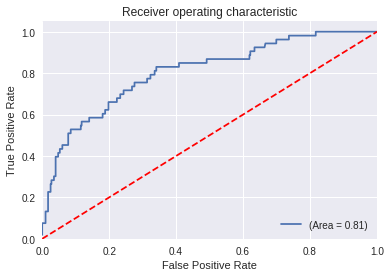


Fold index: 9 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.5860537370908455


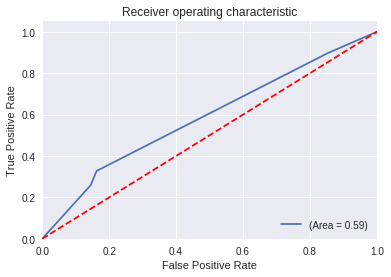


Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Area under ROC curve: 0.8100822685104149


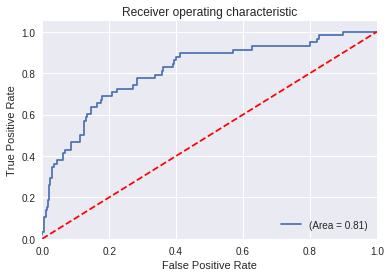


----------------------------------------------
Average results from 10-fold cross-validation

Method                 Area under ROC Curve
Naive_Bayes            0.613884
Logistic_Regression    0.825396
dtype: float64


In [143]:
# ten-fold cross-validation employed here
N_FOLDS = 10

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data3):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   note that 0:model_data.shape[1]-1 slices for explanatory variables
#   and model_data.shape[1]-1 is the index for the response variable    
    X_train = model_data3[train_index, 0:model_data3.shape[1]-1]
    X_test = model_data3[test_index, 0:model_data3.shape[1]-1]
    y_train = model_data3[train_index, model_data3.shape[1]-1]
    y_test = model_data3[test_index, model_data3.shape[1]-1]   
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

    index_for_method = 0  # initialize
    for name, clf in zip(names, classifiers):
        print('\nClassifier evaluation for:', name)
        print('  Scikit Learn method:', clf)
        clf.fit(X_train, y_train)  # fit on the train set for this fold
        # evaluate on the test set for this fold
        y_test_predict = clf.predict_proba(X_test)
        fold_method_result = roc_auc_score(y_test, y_test_predict[:,1]) 
        print('Area under ROC curve:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        #create ROC curve to validate method prediction
        logit_roc_auc = roc_auc_score(y_test, y_test_predict[:,1])
        fpr, tpr, thresholds = roc_curve(y_test, y_test_predict[:,1])
        plt.figure()
        plt.plot(fpr, tpr, label='(Area = %0.2f)' % logit_roc_auc)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.savefig('Log_ROC')
        plt.show()
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      '\nMethod                 Area under ROC Curve', sep = '')     
print(cv_results_df.mean()) 

### Conclusion: 
#### Recommended modeling technique:

Key predictive variables: 

*   'duration' of the previous phone call
*   'balance' in their account
*   'pdays' since the last contact

Classifier evaluation for 10 fold Logistic_Regression
Area under ROC curve average: 0.82
